## Impleament K-Means

K-means is one of the Clustering algorithm that We use.

### Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Download DataSet With Wget commond

In [2]:
!wget https://download1334.mediafire.com/vqnpdhjawqzgatv1cQDD3R7NPLk1J0x3lnt1pUc9S4scNv6pXkHPOyzCRwCD4UQLk4FVUwhG4DSNJ0tZrYaHa8-Ws9fpytsmBliVx6CzUjiVMGxXBQeMwlSfOnsm8ZnHUqwKY96YW1C-vBDwEV-MsPZzvekh-4nr6U6-Ziw980U/6rhqlzs03sfulyr/HW5_files.zip

--2023-05-31 14:27:45--  https://download1334.mediafire.com/vqnpdhjawqzgatv1cQDD3R7NPLk1J0x3lnt1pUc9S4scNv6pXkHPOyzCRwCD4UQLk4FVUwhG4DSNJ0tZrYaHa8-Ws9fpytsmBliVx6CzUjiVMGxXBQeMwlSfOnsm8ZnHUqwKY96YW1C-vBDwEV-MsPZzvekh-4nr6U6-Ziw980U/6rhqlzs03sfulyr/HW5_files.zip
Resolving download1334.mediafire.com (download1334.mediafire.com)... 205.196.123.22
Connecting to download1334.mediafire.com (download1334.mediafire.com)|205.196.123.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 671184 (655K) [application/zip]
Saving to: ‘HW5_files.zip’

HW5_files.zip       100%[===================>] 655.45K  3.28MB/s    in 0.2s    

2023-05-31 14:27:45 (3.28 MB/s) - ‘HW5_files.zip’ saved [671184/671184]



### Unzip File

In [3]:
!unzip -xq HW5_files.zip

In [4]:
!ls

1.csv  2.csv  3.csv  HW5_files.zip  sample_data


### Read First .CSV File

In [5]:
df1 = pd.read_csv('1.csv')
df1.head()

,x,y,color
0,67.032380,131.777258,2
1,412.517529,156.706716,1
2,109.730290,364.408237,4
3,448.511829,343.291836,3
4,405.997147,128.725708,1


In [6]:
pd.unique(df1['color'])

array([2, 1, 4, 3, 0])

### Read Second .CSV File

In [7]:
df2 = pd.read_csv('2.csv')
df2.head()

,x,y,color
0,400.806675,174.702750,6
1,401.154038,70.450386,0
2,294.722093,30.296820,4
3,415.366580,86.633522,0
4,181.464244,83.254630,1


In [8]:
pd.unique(df2['color'])

array([ 6,  0,  4,  1,  7,  3,  8,  5, 10,  2,  9, 11])

### Read Third .CSV File

In [9]:
df3 = pd.read_csv('3.csv')
df3.head()

,x,y,color
0,317.614913,197.197881,2
1,187.085153,164.653509,0
2,245.989615,233.783184,2
3,356.170303,206.712568,2
4,424.640194,141.090956,1


In [10]:
pd.unique(df3['color'])

array([2, 0, 1, 3])

### Shape of CSV Files

In [11]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(2634, 3)
(21600, 3)
(11093, 3)


### Choose DataSet

In [12]:
X = df2.iloc[:,:2].values

### Plot DataSet

<ipython-input-13-3c893185c526>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:, 1], cmap='hot')


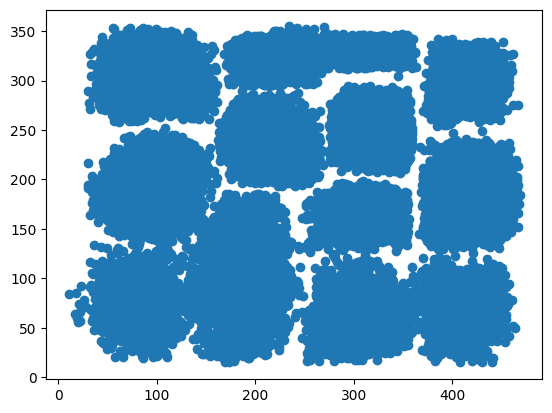

In [13]:
# Scatter plot
plt.scatter(X[:,0], X[:, 1], cmap='hot')
# Display the plot
plt.show()

### Normalize DataSet

In [14]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [15]:
print(np.min(X[:,0]), np.max(X[:,0]))
print(np.min(X[:,1]), np.max(X[:,1]))
print(np.min(X), np.max(X))

-2.0767939650941805 1.7853487432617994
-1.8314942838387718 1.8427454078602434
-2.0767939650941805 1.8427454078602434


### Choose K: Number of Cluster

We can set initial value of K matrix with random number

Note that the K is a matirx with k*n dimension

In [27]:
number_of_cluster = int(input("Enter Number of Cluster: "))
m, n = X.shape
K = np.random.uniform(low=np.min(X), high=np.max(X), size=(number_of_cluster,n))
K

Enter Number of Cluster: 12


array([[ 0.43180577, -1.16883049],
       [ 1.10992702,  0.4551349 ],
       [-0.34692578,  0.68909131],
       [-0.40756023, -1.6167835 ],
       [-0.26983262,  0.07226148],
       [ 1.48410785, -2.06577624],
       [ 1.20575757,  1.54121261],
       [-0.61185481, -1.98842729],
       [-1.17146155, -1.16266927],
       [ 1.30219683,  1.20060682],
       [ 0.57001311, -1.63294673],
       [ 0.45504194,  1.73104897]])

### Impleament Essential Functions For K-means Algorithm

K-means algorithm has two important funtion:

- find closest cluster centroid
- move cluster centroids

* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{0,...,K-1\}$, where $K$ is total number of centroids) to every training example . *(Note: The index range 0 to K-1 varies slightly from what is shown in the lectures (i.e. 1 to K) because Python list indices start at 0 instead of 1)*
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 * $||x^{(i)} - \mu_j||$ is the L2-norm

### Find Closest Centroids

In [17]:
def find_closet_centroids(X, K):
  idx = np.zeros(X.shape[0], dtype=int)
  for i in range(X.shape[0]):
    a = X[i] - K
    idx[i] = np.argmin(np.linalg.norm(a, axis=1))
  return idx

### Compute Centroids

In this function we recompute centroids
* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

In [18]:
def compute_centroids(X, K, idx):
  centroids = np.zeros((K.shape[0], X.shape[1]))
  for cluster in range(K.shape[0]):
    index_of_k = np.where(idx == cluster)[0]
    for i in index_of_k:
      centroids[cluster] += X[i]
    centroids[cluster] /= len(index_of_k)
  return centroids

### Plot Clusters With thier Centers

In [19]:
import matplotlib.cm as cm
def plot_data_with_centroids(X, centroids, idx, k):
  colors = cm.rainbow(np.linspace(0, 1, k))
  for i in range(k):
    plt.scatter(X[idx==i, 0], X[idx==i, 1], c=colors[i], label ='Cluster '+ str(i))
  # Scatter plot
  #plt.scatter(X[:,0], X[:, 1], marker='.')
  plt.plot(centroids[:,0], centroids[:, 1], marker='.', ls='none', ms=10, color='black')
  # Display the plot
  plt.title('Clusterstering')
  plt.legend(loc='upper left', fontsize='xx-small')
  plt.show()

### Calculate Cost function(Distortion)

In [20]:
def calculate_cost(X, K, idx):
  m, n = X.shape
  k = K.shape[0]
  cost = 0.
  for i in range(m):
    cost += np.linalg.norm(X[i] - K[idx[i]])**2
  cost /= m
  return cost

### Run K-Means

In [21]:
def run_k_means(X, initial_k, max_iters):
  cost = []
  idx = find_closet_centroids(X, initial_k)
  cost.append(calculate_cost(X, initial_k, idx))
  centroids = compute_centroids(X, initial_k, idx)
  for i in range(max_iters - 1):
    idx = find_closet_centroids(X, centroids)
    cost.append(calculate_cost(X, centroids, idx))
    centroids = compute_centroids(X, centroids, idx)

  return centroids, idx, cost

<ipython-input-19-237f72dcaebc>:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[idx==i, 0], X[idx==i, 1], c=colors[i], label ='Cluster '+ str(i))


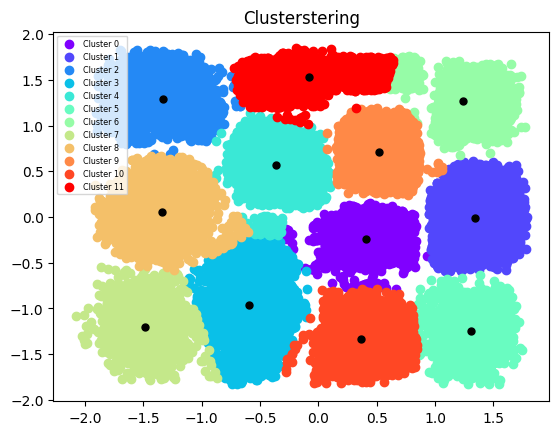

In [28]:
max_iters = 20
centroids, idx, cost = run_k_means(X, K, max_iters)
plot_data_with_centroids(X, centroids, idx, K.shape[0])

### Plot Cost By Iteration 

<function matplotlib.pyplot.show(close=None, block=None)>

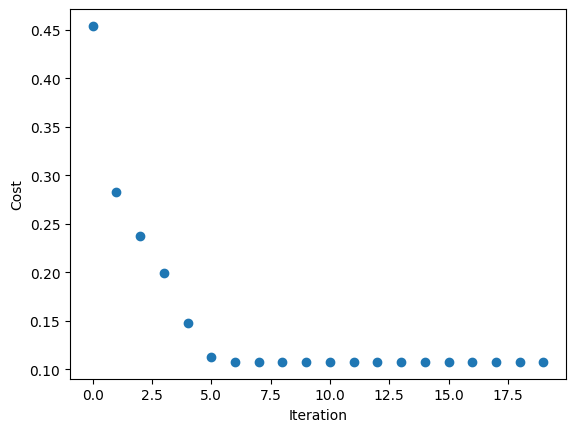

In [29]:
plt.scatter(np.arange(max_iters), cost)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show

### Elbow

One of the key point in k-means algorithm is that how to choose $k$? One way th choose $k$ is Elbow. Through $k = 1$ to $10$ We run k-means and calculate cost for each $k$. Finaly plot Graph of Cost by $K$

In [30]:
def elbow(X):
  lowest_cost = []
  m, n = X.shape
  max_iters = 20
  for k in range(20):
    K = np.random.uniform(low=np.min(X), high=np.max(X), size=(k+1,n))
    centroids, idx, cost = run_k_means(X, K, max_iters)
    lowest_cost.append(np.min(cost))
  return lowest_cost

In [31]:
cost_j = elbow(X)

<ipython-input-18-3d71734b0777>:7: RuntimeWarning: invalid value encountered in true_divide
  centroids[cluster] /= len(index_of_k)


<function matplotlib.pyplot.show(close=None, block=None)>

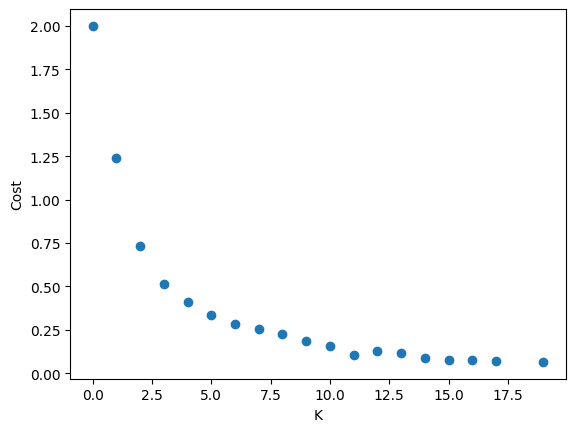

In [32]:
plt.scatter(np.arange(20), cost_j)
plt.xlabel("K")
plt.ylabel("Cost")
plt.show

## Use Sklearn Library

<ipython-input-19-237f72dcaebc>:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[idx==i, 0], X[idx==i, 1], c=colors[i], label ='Cluster '+ str(i))


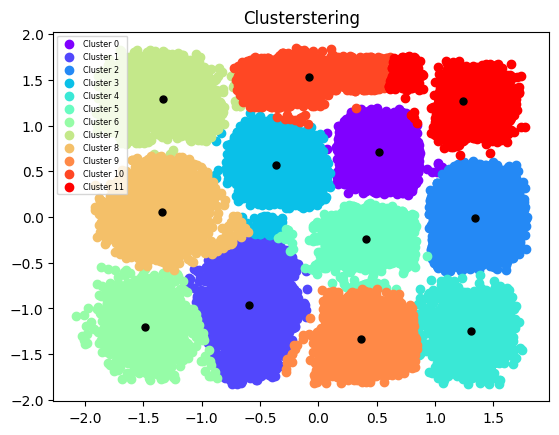

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=number_of_cluster, init ='k-means++', max_iter=20, n_init=10, random_state=0)
idx = kmeans.fit_predict(X)
plot_data_with_centroids(X, kmeans.cluster_centers_, idx, number_of_cluster)

## Impleament DBSCAN Algorithm

<ipython-input-34-3c893185c526>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:, 1], cmap='hot')


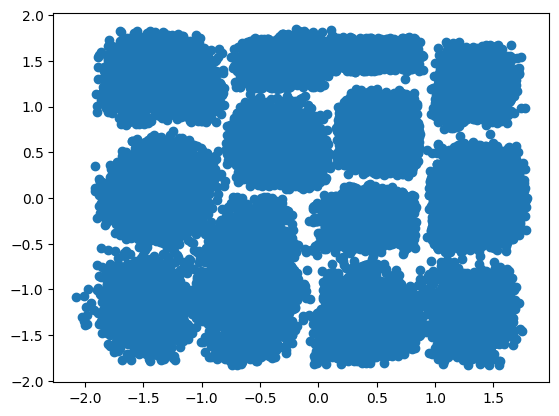

In [34]:
# Scatter plot
plt.scatter(X[:,0], X[:, 1], cmap='hot')
# Display the plot
plt.show()

### Import DBSCAN from Sklearn

for setting eps and min_samples for DBSCAN

- eps = 0.1, min_samples = 10 for first dataset
- eps = 0.0.06, min_samples = 10 for second dataset
- eps = 0.1, min_samples = 10 for third dataset 

In [35]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.06, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 14
Estimated number of noise points: 587


In [36]:
labels

array([0, 1, 2, ..., 4, 5, 3])

In [37]:
true_labels = df2.iloc[:,2].values
true_labels

array([6, 0, 4, ..., 7, 8, 1])

Clustering algorithms are fundamentally unsupervised learning methods. However, since make_blobs gives access to the true labels of the synthetic clusters, it is possible to use evaluation metrics that leverage this “supervised” ground truth information to quantify the quality of the resulting clusters. Examples of such metrics are the homogeneity, completeness, V-measure, Rand-Index, Adjusted Rand-Index and Adjusted Mutual Information (AMI).

If the ground truth labels are not known, evaluation can only be performed using the model results itself. In that case, the Silhouette Coefficient comes in handy.

For more information, see the Adjustment for chance in clustering performance evaluation example or the Clustering performance evaluation module.

### Calculate Metrics

In [38]:
from sklearn import metrics

print(f"Homogeneity: {metrics.homogeneity_score(true_labels, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(true_labels, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(true_labels, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(true_labels, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(true_labels, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.928
Completeness: 0.947
V-measure: 0.937
Adjusted Rand Index: 0.887
Adjusted Mutual Information: 0.937
Silhouette Coefficient: 0.386


### Plot Clusters & Noise Points

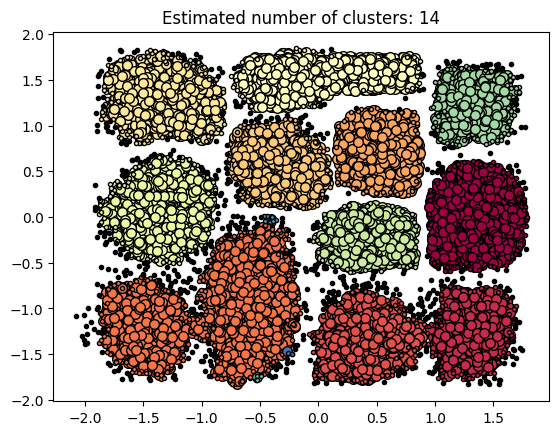

In [39]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        ".",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        ".",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()